<a href="https://colab.research.google.com/github/Rogerio-mack/VLF/blob/main/VLF_plot_fits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.dates import DateFormatter
from matplotlib.pyplot import * # rcparms
from datetime import datetime as dt


In [52]:
!wget https://github.com/Rogerio-mack/VLF/raw/main/teste_data/PIU-20110117.fits


--2023-10-21 01:42:14--  https://github.com/Rogerio-mack/VLF/raw/main/teste_data/PIU-20110117.fits
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Rogerio-mack/VLF/main/teste_data/PIU-20110117.fits [following]
--2023-10-21 01:42:14--  https://raw.githubusercontent.com/Rogerio-mack/VLF/main/teste_data/PIU-20110117.fits
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5532480 (5.3M) [application/octet-stream]
Saving to: ‘PIU-20110117.fits.2’

PIU-20110117.fits.2 100%[===================>]   5.28M  --.-KB/s    in 0.1s    

2023-10-21 01:42:14 (52.9 MB/s) - ‘PIU-20110117.fits.2’ saved [5532480/553248

In [8]:
from astropy.io import fits
fx = fits.open('/content/PIU-20110117.fits', memmap=True)

In [9]:
fx.info()

Filename: /content/PIU-20110117.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      24   (16, 86400)   float32   


In [10]:
fx[0].header

SIMPLE  =                    T / Written by IDL:   4-Feb-2011 12:01:45.00       
BITPIX  =                  -32 /                                                
NAXIS   =                    2 /                                                
NAXIS1  =                   16 /                                                
NAXIS2  =                86400 /                                                
DATE    = '04/02/11'           / Creation date (DD/MM/YY) of FITS header        
DATE-OBS= '2011-01-17'         /                                                
STATION = 'piura   '           /                                                
COL-1   = 'Time-UT (s)'        /                                                
COL-2   = 'GPS Delay (us)'     /                                                
COL-3   = 'NAA-V Phase (deg.)' /                                                
COL-4   = 'NAA-V Amp (dB)'     /                                                
COL-5   = 'NDK-V Phase (deg.

In [16]:
header = []
for a in fx[0].header.values():
  header.append(str(a))

source = header[0:8]
header = header[8::]
header

['Time-UT (s)',
 'GPS Delay (us)',
 'NAA-V Phase (deg.)',
 'NAA-V Amp (dB)',
 'NDK-V Phase (deg.)',
 'NDK-V Amp (dB)',
 'NAA-L Phase (deg.)',
 'NAA-L Amp (dB)',
 'NDK-L Phase (deg.)',
 'NDK-L Amp (dB)',
 'NAU Phase (deg.)',
 'NAU Amp (dB)',
 'NLK Phase (deg.)',
 'NLK Amp (dB)',
 'NPM Phase (deg.)',
 'NPM Amp (dB)']

In [12]:
source

['True', '-32', '2', '16', '86400', '04/02/11', '2011-01-17', 'piura']

In [29]:
t = pd.date_range(fx[0].header['DATE-OBS'],periods=fx[0].header['NAXIS2'],freq='s')
df = pd.DataFrame(fx[0].data,columns=header,index=t)
df.head()

,Time-UT (s),GPS Delay (us),NAA-V Phase (deg.),NAA-V Amp (dB),NDK-V Phase (deg.),NDK-V Amp (dB),NAA-L Phase (deg.),NAA-L Amp (dB),NDK-L Phase (deg.),NDK-L Amp (dB),NAU Phase (deg.),NAU Amp (dB),NLK Phase (deg.),NLK Amp (dB),NPM Phase (deg.),NPM Amp (dB)
2011-01-17 00:00:00,0.0,0.01,-173.259995,24.809999,-67.930000,20.840000,-5.82,-0.34,76.239998,-7.46,103.989998,13.38,168.130005,-6.84,-20.180000,12.54
2011-01-17 00:00:01,1.0,-0.04,-172.750000,24.469999,-67.639999,20.680000,-3.58,-0.70,78.930000,-8.02,104.519997,14.27,174.639999,-7.56,-19.320000,12.46
2011-01-17 00:00:02,2.0,-0.03,-174.309998,24.830000,-71.040001,20.969999,-10.08,-0.34,81.589996,-8.71,105.220001,12.83,177.220001,-7.77,-19.590000,12.35
2011-01-17 00:00:03,3.0,-0.03,-171.860001,24.930000,-67.949997,20.840000,-6.03,-0.16,87.620003,-9.22,102.349998,12.98,184.020004,-7.01,-19.290001,12.49
2011-01-17 00:00:04,4.0,-0.01,-175.020004,24.920000,-68.639999,21.059999,-4.69,-0.32,83.870003,-10.78,98.480003,13.82,179.919998,-7.87,-19.570000,12.30


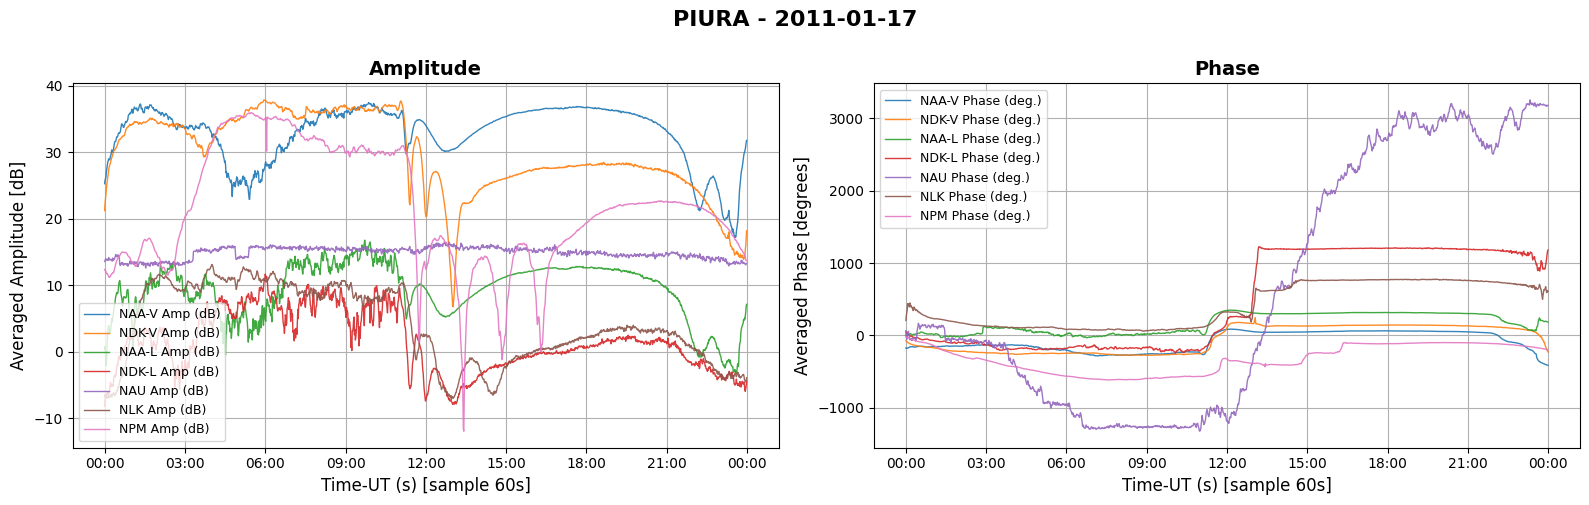

In [65]:
fig, ax = plt.subplots(1,2,figsize=(16,5))

rcParams['figure.figsize'] = 16,5
rcParams['figure.autolayout'] = True
rcParams['font.size'] = 10
rcParams['xtick.labelsize'] = 10

t = pd.date_range(fx[0].header['DATE-OBS'],periods=fx[0].header['NAXIS2'],freq='s')
df = pd.DataFrame(fx[0].data.byteswap().newbyteorder() ,columns=header,index=t) # https://github.com/astropy/astropy/issues/1156

df = df.resample('60 s').mean()

for name in [x for x in header if 'Amp' in x]:
  ax[0].plot(df[name],label=name,lw=1,alpha=0.9)

for name in [x for x in header if 'Phase' in x]:
  ax[1].plot(df[name],label=name,lw=1,alpha=0.9)

plt.suptitle(source[-1].upper() + ' - ' + source[-2],y=1.0,weight='bold',fontsize=16)

ax[0].set_title('Amplitude',weight='bold',fontsize=14)
ax[1].set_title('Phase',weight='bold',fontsize=14)
ax[0].set_xlabel(header[0] + ' [sample 60s]',fontsize=12)
ax[1].set_xlabel(header[0] + ' [sample 60s]',fontsize=12)
ax[0].set_ylabel('Averaged Amplitude [dB]',fontsize=12)
ax[1].set_ylabel('Averaged Phase [degrees]',fontsize=12)

ax[0].xaxis.set_major_formatter(DateFormatter('%H:%M'))
ax[1].xaxis.set_major_formatter(DateFormatter('%H:%M'))

ax[0].legend(loc='best',fontsize=9)
ax[1].legend(loc='best',fontsize=9)
ax[0].grid()
ax[1].grid()

plt.tight_layout()
plt.show()